### Installation

In [ ]:
!pip install -U \
    mysql-connector-python \
    tabulate \
    sqlalchemy \
    pymysql \
    scikit-learn \
    imbalanced-learn \
    catboost \
    seaborn

  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   --- ------------------------------------ 1.6/16.4 MB 7.6 MB/s eta 0:00:02
   ------- -------------------------------- 3.1/16.4 MB 7.7 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.4 MB 7.5 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.4 MB 7.4 MB/s eta 0:00:02
   ------------------- -------------------- 7.9/16.4 MB 7.4 MB/s eta 0:00:02
   ----------------------- ---------------- 9.4/16.4 MB 7.3 MB/s eta 0:00:01
   -------------------------- ------------- 11.0/16.4 MB 7.4 MB/s eta 0:00:01
   ------------------------------ --------- 12.6/16.4 MB 7.4 MB/s eta 0:00:01
   ---------------------------------- ----- 14.2/16.4 MB 7.4 MB/s eta 0:00:01
   -------------------------------------- - 15.7/16.4 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 7.1 MB/s eta 0:00:00
 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'd:\\anaconda\\lib\\site-packages\\_mysql_connector.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



### Imports and connections

<!-- 
### Imports and connections -->

In [2]:
import pandas as pd; import mysql.connector, json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

In [3]:
from sqlalchemy import create_engine; from tabulate import tabulate

In [4]:
mydb=mysql.connector.connect(
    host="localhost",
    username="root",
    password="",
    port=3306)
mycursor=mydb.cursor(buffered=True)

In [5]:
# mycursor.execute("CREATE DATABASE project4")

In [6]:
mycursor.execute("USE project4")

In [7]:
username = 'root'
password = 'your_password'
host = 'localhost'
port = 3306
database = 'project4'
engine = create_engine('mysql+pymysql://root@localhost/project4')

### Converting Excel as dataframe

In [8]:
file_names = ["City", "Continent", "Country", "Item", "Mode", "Region", "Transaction", "Type", "Updated_Item", "User"]
dfs = {name: pd.read_excel(os.path.join(r"D:\MyProjectsDuplicates\project4\datas", f"{name}.xlsx")) for name in file_names}
print(dfs.keys())

KeyboardInterrupt: 

In [ ]:
# Step 1: Prepare file_names and load all Excel sheets into a dict
folder_path = r"D:\MyProjectsDuplicates\project4\datas"
file_names = [os.path.splitext(f)[0] for f in os.listdir(folder_path) if f.endswith(".xlsx")]
dfs = {name: pd.read_excel(os.path.join(folder_path, f"{name}.xlsx")) for name in file_names}
# Step 2: Pickle the dfs dictionary
with open("dfs.pkl", "wb") as f:
    pickle.dump(dfs, f)
print("Pickled successfully!")

In [9]:
# Step 1: Load the pickle file
with open("dfs.pkl", "rb") as f:
    dfs = pickle.load(f)

In [10]:
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10 = (
    dfs[k] for k in ['City', 'Continent', 'Country', 'Item', 'Mode', 
                     'Region', 'Transaction', 'Type', 'Updated_Item', 'User'])

In [11]:
df7

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3
...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4
52926,211238,88112,2016,2,2,1297,5
52927,211239,88112,2016,2,2,1297,4
52928,211240,88112,2016,2,2,1297,4


### Conversion to single dataframe

In [ ]:
# Merge user details into transaction data using UserId
df7 = df7.merge(df10[['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId']],
                on='UserId', how='left')
df7

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId
0,3,70456,2022,10,2,640,5,5,21,163,4341.0
1,8,7567,2022,10,4,640,5,2,8,48,464.0
2,9,79069,2022,10,3,640,5,2,9,54,774.0
3,10,31019,2022,10,3,640,3,5,17,135,583.0
4,15,43611,2022,10,2,640,3,5,21,163,1396.0
...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,21,159,7460.0
52926,211238,88112,2016,2,2,1297,5,5,17,133,6164.0
52927,211239,88112,2016,2,2,1297,4,5,17,133,6164.0
52928,211240,88112,2016,2,2,1297,4,5,17,133,6164.0


In [13]:
# Remove .0 and convert to int
df7['CityId'] = df7['CityId'].astype('Int64')  # Safe nullable integer type

In [14]:
dfreg=df7

In [15]:
# Step 1: Merge dfreg with df9 to get the correct AttractionTypeId
dfreg = dfreg.merge(df9[['AttractionId', 'AttractionTypeId', 'AttractionCityId']], on='AttractionId', how='left')
dfreg

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId,AttractionTypeId,AttractionCityId
0,3,70456,2022,10,2,640,5,5,21,163,4341,63,1
1,8,7567,2022,10,4,640,5,2,8,48,464,63,1
2,9,79069,2022,10,3,640,5,2,9,54,774,63,1
3,10,31019,2022,10,3,640,3,5,17,135,583,63,1
4,15,43611,2022,10,2,640,3,5,21,163,1396,63,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,21,159,7460,44,3
52926,211238,88112,2016,2,2,1297,5,5,17,133,6164,44,3
52927,211239,88112,2016,2,2,1297,4,5,17,133,6164,44,3
52928,211240,88112,2016,2,2,1297,4,5,17,133,6164,44,3


In [16]:
# Step 1: Create mapping from name to ID
name_to_id = dict(zip(df8['AttractionType'], df8['AttractionTypeId']))
# Step 2: Replace string names with corresponding numeric IDs
dfreg['AttractionTypeId'] = dfreg['AttractionTypeId'].replace(name_to_id).infer_objects(copy=False)
dfreg

C:\Users\USER\AppData\Local\Temp\ipykernel_9956\2206064556.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfreg['AttractionTypeId'] = dfreg['AttractionTypeId'].replace(name_to_id).infer_objects(copy=False)


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId,AttractionTypeId,AttractionCityId
0,3,70456,2022,10,2,640,5,5,21,163,4341,63,1
1,8,7567,2022,10,4,640,5,2,8,48,464,63,1
2,9,79069,2022,10,3,640,5,2,9,54,774,63,1
3,10,31019,2022,10,3,640,3,5,17,135,583,63,1
4,15,43611,2022,10,2,640,3,5,21,163,1396,63,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,21,159,7460,44,3
52926,211238,88112,2016,2,2,1297,5,5,17,133,6164,44,3
52927,211239,88112,2016,2,2,1297,4,5,17,133,6164,44,3
52928,211240,88112,2016,2,2,1297,4,5,17,133,6164,44,3


In [17]:
dfreg.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating', 'ContinentId', 'RegionId', 'CountryId',
       'CityId', 'AttractionTypeId', 'AttractionCityId'],
      dtype='object')

In [18]:
dfreg.rename(columns={'CityId': 'VisitorCityId'}, inplace=True)
dfreg.rename(columns={'ContinentId': 'VisitorContinentId'}, inplace=True)
dfreg.rename(columns={'RegionId': 'VisitorRegionId'}, inplace=True)
dfreg.rename(columns={'CountryId': 'VisitorCountryId'}, inplace=True)

In [19]:
dfreg = dfreg[[ 'VisitYear', 'VisitMonth','TransactionId', 'AttractionTypeId', 'AttractionId', 'AttractionCityId', 'UserId',
            'VisitMode', 'VisitorCityId', 'VisitorCountryId', 'VisitorRegionId', 'VisitorContinentId', 'Rating']] 

In [20]:
dfreg = dfreg.dropna(subset=['VisitorCityId'])

In [21]:
dfreg.isnull().sum()

VisitYear             0
VisitMonth            0
TransactionId         0
AttractionTypeId      0
AttractionId          0
AttractionCityId      0
UserId                0
VisitMode             0
VisitorCityId         0
VisitorCountryId      0
VisitorRegionId       0
VisitorContinentId    0
Rating                0
dtype: int64

In [22]:
dfreg['AttractionTypeId'] = dfreg['AttractionTypeId'].astype(int)

In [23]:
dfreg.dtypes

VisitYear             int64
VisitMonth            int64
TransactionId         int64
AttractionTypeId      int32
AttractionId          int64
AttractionCityId      int64
UserId                int64
VisitMode             int64
VisitorCityId         Int64
VisitorCountryId      int64
VisitorRegionId       int64
VisitorContinentId    int64
Rating                int64
dtype: object

In [24]:
dfreg = dfreg.drop(['VisitYear', 'VisitMode', 'Rating', 'UserId', 'TransactionId'], axis=1)

In [25]:
dfreg

,VisitMonth,AttractionTypeId,AttractionId,AttractionCityId,VisitorCityId,VisitorCountryId,VisitorRegionId,VisitorContinentId
0,10,63,640,1,4341,163,21,5
1,10,63,640,1,464,48,8,2
2,10,63,640,1,774,54,9,2
3,10,63,640,1,583,135,17,5
4,10,63,640,1,1396,163,21,5
...,...,...,...,...,...,...,...,...
52925,9,44,1297,3,7460,159,21,5
52926,2,44,1297,3,6164,133,17,5
52927,2,44,1297,3,6164,133,17,5
52928,2,44,1297,3,6164,133,17,5


In [26]:
df7

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId
0,3,70456,2022,10,2,640,5,5,21,163,4341
1,8,7567,2022,10,4,640,5,2,8,48,464
2,9,79069,2022,10,3,640,5,2,9,54,774
3,10,31019,2022,10,3,640,3,5,17,135,583
4,15,43611,2022,10,2,640,3,5,21,163,1396
...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,9,2,1297,4,5,21,159,7460
52926,211238,88112,2016,2,2,1297,5,5,17,133,6164
52927,211239,88112,2016,2,2,1297,4,5,17,133,6164
52928,211240,88112,2016,2,2,1297,4,5,17,133,6164


In [27]:
# Create the mapping dictionary from df8
mapping = dict(zip(df2['ContinentId'], df2['Continent']))
# Only replace values that are numeric (IDs), leave names untouched
df7['ContinentId'] = df7['ContinentId'].apply(
    lambda x: mapping[int(x)] if isinstance(x, (int, float)) and int(x) in mapping else x)
# Optionally rename column
df7.rename(columns={'ContinentId': 'ContinentName'}, inplace=True)

In [28]:
# Step 1: Create the CityId → CityName mapping from df1
city_mapping = dict(zip(df1['CityId'], df1['CityName']))
# Step 2: Replace CityId with CityName safely
df7['CityId'] = df7['CityId'].apply(
    lambda x: city_mapping[int(x)] if pd.notnull(x) and int(x) in city_mapping else x)
# Step 3: Rename the column
df7.rename(columns={'CityId': 'CityName'}, inplace=True)

In [29]:
# Create the mapping dictionary from df8
mapping = dict(zip(df3['CountryId'], df3['Country']))
# Only replace values that are numeric (IDs), leave names untouched
df7['CountryId'] = df7['CountryId'].apply(
    lambda x: mapping[int(x)] if isinstance(x, (int, float)) and int(x) in mapping else x)
# Optionally rename column
df7.rename(columns={'CountryId': 'CountryName'}, inplace=True)

In [30]:
# Create the mapping dictionary from df8
mapping = dict(zip(df6['RegionId'], df6['Region']))
# Only replace values that are numeric (IDs), leave names untouched
df7['RegionId'] = df7['RegionId'].apply(
    lambda x: mapping[int(x)] if isinstance(x, (int, float)) and int(x) in mapping else x)
# Optionally rename column
df7.rename(columns={'RegionId': 'RegionName'}, inplace=True)

In [31]:
# Step 1: Create the mapping dictionary from your VisitMode table
visit_mode_mapping = {
    0: '-',
    1: 'Business',
    2: 'Couples',
    3: 'Family',
    4: 'Friends',
    5: 'Solo'}
# Step 2: Replace VisitModeId with actual VisitMode names in df7
df7['VisitMode'] = df7['VisitMode'].apply(
    lambda x: visit_mode_mapping.get(int(x), x) if pd.notnull(x) else x)

In [32]:
import calendar
# Create a new column with the month name
df7['VisitMonthName'] = df7['VisitMonth'].apply(
    lambda x: calendar.month_name[int(x)] if pd.notnull(x) and 1 <= int(x) <= 12 else x)

In [33]:
df7.drop(columns=['VisitMonth'], inplace=True)

In [34]:
df7.isnull().sum()

TransactionId     0
UserId            0
VisitYear         0
VisitMode         0
AttractionId      0
Rating            0
ContinentName     0
RegionName        0
CountryName       0
CityName          8
VisitMonthName    0
dtype: int64

In [35]:
transaction_mapping = dict(zip(df9['AttractionId'], df9['Attraction']))
df7['AttractionId'] = df7['AttractionId'].apply(
    lambda x: transaction_mapping[int(x)] if isinstance(x, (int, float)) and int(x) in city_mapping else x)
df7.rename(columns={'AttractionId': 'Attraction'}, inplace=True)

In [36]:
# Step: Create a mapping from Attraction to AttractionCityId using df9
attraction_cityid_map = dict(zip(df9['Attraction'], df9['AttractionCityId']))
# Step: Map the AttractionCityId into df7ed on the Attraction name
df7['AttractionCityId'] = df7['Attraction'].map(attraction_cityid_map)

In [37]:
# Step 1: Map AttractionCityId to CityName using df1
city_name_mapping = df1.set_index('CityId')['CityName'].to_dict()
# Step 2: Map into df7 based on AttractionCityId
df7['AttractionCityName'] = df7['AttractionCityId'].map(city_name_mapping)
# Step 3: Drop AttractionCityId column
df7.drop(columns=['AttractionCityId'], inplace=True)

In [38]:
# Step 1: Merge df7 with df9 to get AttractionTypeId
df7 = df7.merge(df9[['Attraction', 'AttractionTypeId']], on='Attraction', how='left')
# Step 2: Merge df7 with df8 to get AttractionType name
df7 = df7.merge(df8, on='AttractionTypeId', how='left')
# Optional: Drop AttractionTypeId if only name is needed
df7 = df7.drop(columns=['AttractionTypeId'])

In [39]:
df7

,TransactionId,UserId,VisitYear,VisitMode,Attraction,Rating,ContinentName,RegionName,CountryName,CityName,VisitMonthName,AttractionCityName,AttractionType
0,3,70456,2022,Couples,Sacred Monkey Forest Sanctuary,5,Europe,Western Europe,United Kingdom,Guildford,October,Douala,Nature & Wildlife Areas
1,8,7567,2022,Friends,Sacred Monkey Forest Sanctuary,5,America,Northern America,Canada,Ontario,October,Douala,Nature & Wildlife Areas
2,9,79069,2022,Family,Sacred Monkey Forest Sanctuary,5,America,South America,Brazil,Brazil,October,Douala,Nature & Wildlife Areas
3,10,31019,2022,Family,Sacred Monkey Forest Sanctuary,3,Europe,Central Europe,Switzerland,Zurich,October,Douala,Nature & Wildlife Areas
4,15,43611,2022,Couples,Sacred Monkey Forest Sanctuary,3,Europe,Western Europe,United Kingdom,Manchester,October,Douala,Nature & Wildlife Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,211227,87100,2018,Couples,Yogyakarta Palace,4,Europe,Western Europe,France,Lyon,September,N'Djamena,Historic Sites
52926,211238,88112,2016,Couples,Yogyakarta Palace,5,Europe,Central Europe,Slovakia,Bratislava Region,February,N'Djamena,Historic Sites
52927,211239,88112,2016,Couples,Yogyakarta Palace,4,Europe,Central Europe,Slovakia,Bratislava Region,February,N'Djamena,Historic Sites
52928,211240,88112,2016,Couples,Yogyakarta Palace,4,Europe,Central Europe,Slovakia,Bratislava Region,February,N'Djamena,Historic Sites


In [40]:
dffinal=df7

In [41]:
dffinal.rename(columns={'CityName': 'VisitorCity'}, inplace=True)
dffinal.rename(columns={'ContinentName': 'VisitorContinent'}, inplace=True)
dffinal.rename(columns={'RegionName': 'VisitorRegion'}, inplace=True)
dffinal.rename(columns={'CountryName': 'VisitorCountry'}, inplace=True)
dffinal.rename(columns={'AttractionCityName': 'AttractionCity'}, inplace=True)

In [42]:
dffinal.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMode', 'Attraction',
       'Rating', 'VisitorContinent', 'VisitorRegion', 'VisitorCountry',
       'VisitorCity', 'VisitMonthName', 'AttractionCity', 'AttractionType'],
      dtype='object')

In [43]:
dffinal = dffinal[[ 'VisitYear', 'VisitMonthName','TransactionId', 'AttractionType', 'Attraction', 'AttractionCity', 'UserId',
            'VisitMode', 'VisitorCity', 'VisitorCountry', 'VisitorRegion', 'VisitorContinent', 'Rating']] 

In [ ]:
# Find duplicated rows
duplicates = dffinal[dffinal.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [VisitYear, VisitMonthName, TransactionId, AttractionType, Attraction, AttractionCity, UserId, VisitMode, VisitorCity, VisitorCountry, VisitorRegion, VisitorContinent, Rating]
Index: []


In [45]:
dffinal = dffinal.dropna(subset=['VisitorCity'])
dffinal

,VisitYear,VisitMonthName,TransactionId,AttractionType,Attraction,AttractionCity,UserId,VisitMode,VisitorCity,VisitorCountry,VisitorRegion,VisitorContinent,Rating
0,2022,October,3,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,70456,Couples,Guildford,United Kingdom,Western Europe,Europe,5
1,2022,October,8,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,7567,Friends,Ontario,Canada,Northern America,America,5
2,2022,October,9,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,79069,Family,Brazil,Brazil,South America,America,5
3,2022,October,10,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,31019,Family,Zurich,Switzerland,Central Europe,Europe,3
4,2022,October,15,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,43611,Couples,Manchester,United Kingdom,Western Europe,Europe,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,2018,September,211227,Historic Sites,Yogyakarta Palace,N'Djamena,87100,Couples,Lyon,France,Western Europe,Europe,4
52926,2016,February,211238,Historic Sites,Yogyakarta Palace,N'Djamena,88112,Couples,Bratislava Region,Slovakia,Central Europe,Europe,5
52927,2016,February,211239,Historic Sites,Yogyakarta Palace,N'Djamena,88112,Couples,Bratislava Region,Slovakia,Central Europe,Europe,4
52928,2016,February,211240,Historic Sites,Yogyakarta Palace,N'Djamena,88112,Couples,Bratislava Region,Slovakia,Central Europe,Europe,4


In [46]:
dfreg

,VisitMonth,AttractionTypeId,AttractionId,AttractionCityId,VisitorCityId,VisitorCountryId,VisitorRegionId,VisitorContinentId
0,10,63,640,1,4341,163,21,5
1,10,63,640,1,464,48,8,2
2,10,63,640,1,774,54,9,2
3,10,63,640,1,583,135,17,5
4,10,63,640,1,1396,163,21,5
...,...,...,...,...,...,...,...,...
52925,9,44,1297,3,7460,159,21,5
52926,2,44,1297,3,6164,133,17,5
52927,2,44,1297,3,6164,133,17,5
52928,2,44,1297,3,6164,133,17,5


In [ ]:
import pandas as pd
dffinal = dffinal.copy()
dfreg = dfreg.copy()
assert len(dffinal) == len(dfreg), "Row count mismatch. Cannot concat."
df = pd.concat([dfreg.reset_index(drop=True), dffinal.reset_index(drop=True)], axis=1)
print("Shape after concat:", df.shape)

Shape after concat: (52922, 21)


In [48]:
df

,VisitMonth,AttractionTypeId,AttractionId,AttractionCityId,VisitorCityId,VisitorCountryId,VisitorRegionId,VisitorContinentId,VisitYear,VisitMonthName,...,AttractionType,Attraction,AttractionCity,UserId,VisitMode,VisitorCity,VisitorCountry,VisitorRegion,VisitorContinent,Rating
0,10,63,640,1,4341,163,21,5,2022,October,...,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,70456,Couples,Guildford,United Kingdom,Western Europe,Europe,5
1,10,63,640,1,464,48,8,2,2022,October,...,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,7567,Friends,Ontario,Canada,Northern America,America,5
2,10,63,640,1,774,54,9,2,2022,October,...,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,79069,Family,Brazil,Brazil,South America,America,5
3,10,63,640,1,583,135,17,5,2022,October,...,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,31019,Family,Zurich,Switzerland,Central Europe,Europe,3
4,10,63,640,1,1396,163,21,5,2022,October,...,Nature & Wildlife Areas,Sacred Monkey Forest Sanctuary,Douala,43611,Couples,Manchester,United Kingdom,Western Europe,Europe,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,9,44,1297,3,7460,159,21,5,2018,September,...,Historic Sites,Yogyakarta Palace,N'Djamena,87100,Couples,Lyon,France,Western Europe,Europe,4
52918,2,44,1297,3,6164,133,17,5,2016,February,...,Historic Sites,Yogyakarta Palace,N'Djamena,88112,Couples,Bratislava Region,Slovakia,Central Europe,Europe,5
52919,2,44,1297,3,6164,133,17,5,2016,February,...,Historic Sites,Yogyakarta Palace,N'Djamena,88112,Couples,Bratislava Region,Slovakia,Central Europe,Europe,4
52920,2,44,1297,3,6164,133,17,5,2016,February,...,Historic Sites,Yogyakarta Palace,N'Djamena,88112,Couples,Bratislava Region,Slovakia,Central Europe,Europe,4


In [49]:
df.columns

Index(['VisitMonth', 'AttractionTypeId', 'AttractionId', 'AttractionCityId',
       'VisitorCityId', 'VisitorCountryId', 'VisitorRegionId',
       'VisitorContinentId', 'VisitYear', 'VisitMonthName', 'TransactionId',
       'AttractionType', 'Attraction', 'AttractionCity', 'UserId', 'VisitMode',
       'VisitorCity', 'VisitorCountry', 'VisitorRegion', 'VisitorContinent',
       'Rating'],
      dtype='object')

In [50]:
print(df.shape)
# print(df.columns)
# print(df.head())
# print(df.info())
# print(df.isnull().sum())

(52922, 21)


In [51]:
df = df[[ 'VisitYear', 'VisitMonth', 'VisitMonthName', 'TransactionId','AttractionTypeId', 'AttractionType', 'AttractionId', 'Attraction','AttractionCityId', 'AttractionCity', 'UserId', 'VisitMode', 'VisitorCityId', 'VisitorCity', 'VisitorCountryId', 'VisitorCountry', 'VisitorRegionId','VisitorRegion', 'VisitorContinentId', 'VisitorContinent', 'Rating']] 

### Cleaned dataframe

In [52]:
df

,VisitYear,VisitMonth,VisitMonthName,TransactionId,AttractionTypeId,AttractionType,AttractionId,Attraction,AttractionCityId,AttractionCity,...,VisitMode,VisitorCityId,VisitorCity,VisitorCountryId,VisitorCountry,VisitorRegionId,VisitorRegion,VisitorContinentId,VisitorContinent,Rating
0,2022,10,October,3,63,Nature & Wildlife Areas,640,Sacred Monkey Forest Sanctuary,1,Douala,...,Couples,4341,Guildford,163,United Kingdom,21,Western Europe,5,Europe,5
1,2022,10,October,8,63,Nature & Wildlife Areas,640,Sacred Monkey Forest Sanctuary,1,Douala,...,Friends,464,Ontario,48,Canada,8,Northern America,2,America,5
2,2022,10,October,9,63,Nature & Wildlife Areas,640,Sacred Monkey Forest Sanctuary,1,Douala,...,Family,774,Brazil,54,Brazil,9,South America,2,America,5
3,2022,10,October,10,63,Nature & Wildlife Areas,640,Sacred Monkey Forest Sanctuary,1,Douala,...,Family,583,Zurich,135,Switzerland,17,Central Europe,5,Europe,3
4,2022,10,October,15,63,Nature & Wildlife Areas,640,Sacred Monkey Forest Sanctuary,1,Douala,...,Couples,1396,Manchester,163,United Kingdom,21,Western Europe,5,Europe,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,2018,9,September,211227,44,Historic Sites,1297,Yogyakarta Palace,3,N'Djamena,...,Couples,7460,Lyon,159,France,21,Western Europe,5,Europe,4
52918,2016,2,February,211238,44,Historic Sites,1297,Yogyakarta Palace,3,N'Djamena,...,Couples,6164,Bratislava Region,133,Slovakia,17,Central Europe,5,Europe,5
52919,2016,2,February,211239,44,Historic Sites,1297,Yogyakarta Palace,3,N'Djamena,...,Couples,6164,Bratislava Region,133,Slovakia,17,Central Europe,5,Europe,4
52920,2016,2,February,211240,44,Historic Sites,1297,Yogyakarta Palace,3,N'Djamena,...,Couples,6164,Bratislava Region,133,Slovakia,17,Central Europe,5,Europe,4


In [ ]:
df.to_excel("df.xlsx", index=False)

In [ ]:
df.to_sql(name='data', con=engine, if_exists='replace', index=False)

### Basic visualization

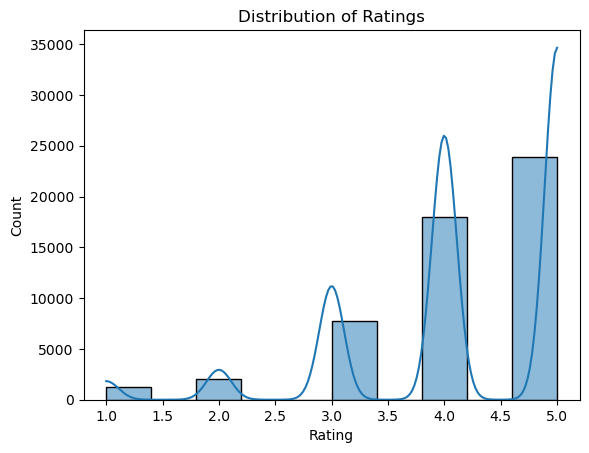

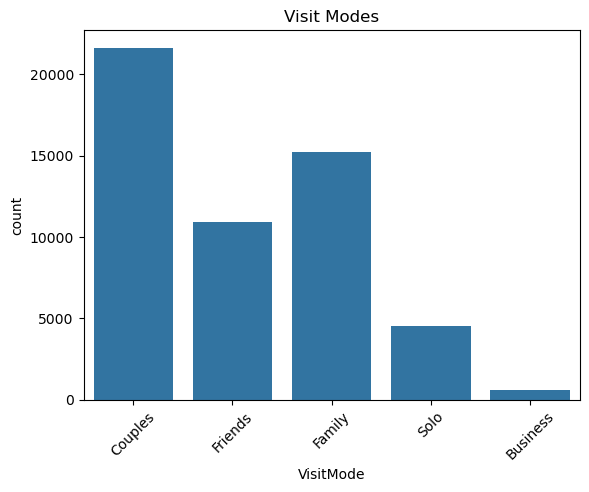

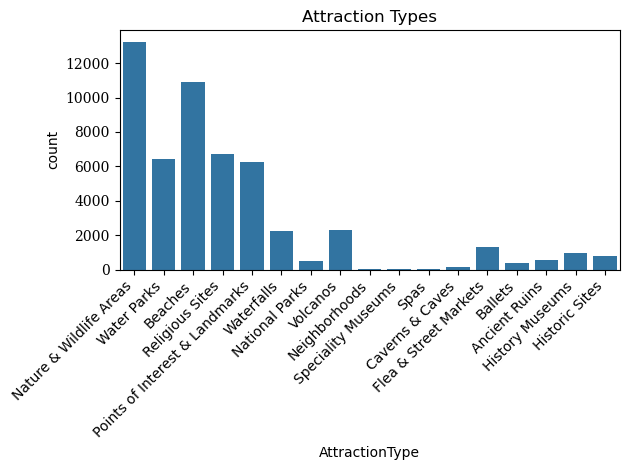

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.show()

sns.countplot(data=df, x='VisitMode')
plt.title('Visit Modes')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='AttractionType')
plt.title('Attraction Types')
plt.yticks(fontsize=10, family='serif')  # Customize as needed
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Regression model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Loading Data 
engine = create_engine("mysql+pymysql://root:@localhost:3306/project4")
df = pd.read_sql("SELECT * FROM data", con=engine)

# Drop irrelevant text columns
df = df.drop(columns=[
    'TransactionId', 'VisitMonthName', 'Attraction', 'VisitorCity', 
    'VisitorCountry', 'VisitorRegion', 'VisitorContinent', 
    'AttractionType', 'AttractionCity'])

# Define features and target
X = df.drop(columns=['Rating'])
y = df['Rating']

# Correctly identify feature types
onehot_cols = ['VisitMode']  # only true categorical text column
numeric_cols = [
    'VisitorCityId', 'VisitorCountryId', 'VisitorRegionId', 'VisitorContinentId',
    'AttractionTypeId', 'AttractionId', 'AttractionCityId', 'VisitYear', 'VisitMonth']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
    ('num', StandardScaler(), numeric_cols)])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42))])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("🔍 R² Score:", round(r2_score(y_test, y_pred), 4))
print("📉 MSE     :", round(mean_squared_error(y_test, y_pred), 4))

🔍 R² Score: 0.1301
📉 MSE     : 0.8265


In [29]:
df

,VisitYear,VisitMonth,AttractionTypeId,AttractionId,AttractionCityId,UserId,VisitMode,VisitorCityId,VisitorCountryId,VisitorRegionId,VisitorContinentId,Rating,VisitMonth_Year,CountryVisitCount,AttractionAvgRating,Season
0,2022,10,63,640,1,70456,Couples,4341,163,21,5,5,20220,6722,4.267030,Autumn
1,2022,10,63,640,1,7567,Friends,464,48,8,2,5,20220,1486,4.267030,Autumn
2,2022,10,63,640,1,79069,Family,774,54,9,2,5,20220,140,4.267030,Autumn
3,2022,10,63,640,1,31019,Family,583,135,17,5,3,20220,253,4.267030,Autumn
4,2022,10,63,640,1,43611,Couples,1396,163,21,5,3,20220,6722,4.267030,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52917,2018,9,44,1297,3,87100,Couples,7460,159,21,5,4,18162,415,3.538847,Autumn
52918,2016,2,44,1297,3,88112,Couples,6164,133,17,5,5,4032,55,3.538847,Winter
52919,2016,2,44,1297,3,88112,Couples,6164,133,17,5,4,4032,55,3.538847,Winter
52920,2016,2,44,1297,3,88112,Couples,6164,133,17,5,4,4032,55,3.538847,Winter


In [58]:
df['VisitMode'].value_counts()

VisitMode
Couples     21617
Family      15215
Friends     10944
Solo         4523
Business      623
Name: count, dtype: int64

### Regression model

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from catboost import CatBoostRegressor, Pool

# Loading dataset
engine = create_engine("mysql+pymysql://root:@localhost:3306/project4")
df = pd.read_sql("SELECT * FROM data", con=engine)

# Drop raw text columns
df.drop(columns=[
    'TransactionId', 'VisitMonthName', 'Attraction', 'VisitorCity',
    'VisitorCountry', 'VisitorRegion', 'VisitorContinent',
    'AttractionCity', 'AttractionType'
], inplace=True)

# Behavioral Features 
user_stats = df.groupby('UserId').agg({
    'Rating': ['count', 'mean'],
    'AttractionId': 'nunique',
    'VisitMode': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]}).reset_index()

user_stats.columns = [
    'UserId', 'User_TotalVisits', 'User_AvgRating',
    'User_AttractionDiversity', 'User_VisitMode_MostUsed']
df = df.merge(user_stats, on='UserId', how='left')

# Encode VisitMode most used (new column)
df['User_VisitMode_MostUsed'] = df['User_VisitMode_MostUsed'].astype(str)

# Contextual Features 
df['Is_SameCountry'] = (df['VisitorCountryId'] == df['AttractionCityId']).astype(int)
df['Is_SameRegion'] = (df['VisitorRegionId'] == df['AttractionCityId']).astype(int)
df['Is_SameContinent'] = (df['VisitorContinentId'] == df['AttractionCityId']).astype(int)

# Season Feature 
def get_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    else: return 'Winter'

df['Season'] = df['VisitMonth'].apply(get_season)

# Attraction aggregates 
attr_avg = df.groupby('AttractionId')['Rating'].mean().reset_index()
attr_avg.columns = ['AttractionId', 'Attraction_AvgRating']
df = df.merge(attr_avg, on='AttractionId', how='left')

# Interaction Features 
df['User_Attraction_Pair'] = df['UserId'].astype(str) + '_' + df['AttractionId'].astype(str)
df['Country_VisitMode'] = df['VisitorCountryId'].astype(str) + '_' + df['VisitMode'].astype(str)
df['Region_VisitMonth'] = df['VisitorRegionId'].astype(str) + '_' + df['VisitMonth'].astype(str)
df['Region_Season'] = df['VisitorRegionId'].astype(str) + '_' + df['Season']
df['Continent_Season'] = df['VisitorContinentId'].astype(str) + '_' + df['Season']
df['VisitMode_Season'] = df['VisitMode'].astype(str) + '_' + df['Season']
df['User_PreferredMode_Season'] = df['User_VisitMode_MostUsed'].astype(str) + '_' + df['Season']
df['Attraction_City_Season'] = df['AttractionCityId'].astype(str) + '_' + df['Season']
df['Attraction_Mode'] = df['AttractionId'].astype(str) + '_' + df['VisitMode'].astype(str)
df['Visitor_Area'] = df['VisitorRegionId'].astype(str) + '_' + df['AttractionCityId'].astype(str)

# Target Transformation
df['Rating_log'] = np.log1p(df['Rating'])

# Define Features and Target 
X = df.drop(columns=['Rating', 'Rating_log'])
y_log = df['Rating_log']

# Update Categorical Columns 
categorical_cols = [
    'VisitMode', 'VisitorCityId', 'VisitorCountryId', 'VisitorRegionId',
    'VisitorContinentId', 'AttractionTypeId', 'AttractionId', 'AttractionCityId',
    'User_VisitMode_MostUsed', 'Season',
    # Interaction features
    'User_Attraction_Pair', 'Country_VisitMode', 'Region_VisitMonth', 'Region_Season',
    'Continent_Season', 'VisitMode_Season', 'User_PreferredMode_Season',
    'Attraction_City_Season', 'Attraction_Mode', 'Visitor_Area']

# Train/Test Split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42)

# Model Training with CatBoost 
train_pool = Pool(X_train, y_train_log, cat_features=categorical_cols)
test_pool = Pool(X_test, y_test_log, cat_features=categorical_cols)

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    early_stopping_rounds=50,
    eval_metric='RMSE',
    verbose=100,
    random_seed=42)
model.fit(train_pool, eval_set=test_pool)

# Prediction and Inverse Transformation 
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Evaluation 
print(" R² Score (real scale):", round(r2_score(y_test, y_pred), 4))
print(" MSE (real scale)     :", round(mean_squared_error(y_test, y_pred), 4))

0:	learn: 0.2205492	test: 0.2221834	best: 0.2221834 (0)	total: 365ms	remaining: 6m 4s
100:	learn: 0.1117386	test: 0.1135686	best: 0.1135686 (100)	total: 29.4s	remaining: 4m 21s
200:	learn: 0.1098484	test: 0.1120382	best: 0.1120382 (200)	total: 56.4s	remaining: 3m 44s


In [68]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# Load Data 
engine = create_engine("mysql+pymysql://root:@localhost:3306/project4")
df = pd.read_sql("SELECT * FROM data", con=engine)

# Drop raw text columns 
df.drop(columns=[
    'TransactionId', 'VisitMonthName', 'Attraction', 'VisitorCity',
    'VisitorCountry', 'VisitorRegion', 'VisitorContinent',
    'AttractionCity', 'AttractionType'], inplace=True)

# Behavioral Features
user_stats = df.groupby('UserId').agg({
    'Rating': ['count', 'mean'],
    'AttractionId': 'nunique',
    'VisitMode': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]}).reset_index()

user_stats.columns = [
    'UserId', 'User_TotalVisits', 'User_AvgRating',
    'User_AttractionDiversity', 'User_VisitMode_MostUsed']
df = df.merge(user_stats, on='UserId', how='left')
df['User_VisitMode_MostUsed'] = df['User_VisitMode_MostUsed'].astype(str)

# Contextual Features
df['Is_SameCountry'] = (df['VisitorCountryId'] == df['AttractionCityId']).astype(int)
df['Is_SameRegion'] = (df['VisitorRegionId'] == df['AttractionCityId']).astype(int)
df['Is_SameContinent'] = (df['VisitorContinentId'] == df['AttractionCityId']).astype(int)

# Season Feature 
def get_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Fall'
    else: return 'Winter'
df['Season'] = df['VisitMonth'].apply(get_season)

# Attraction Averages
attr_avg = df.groupby('AttractionId')['Rating'].mean().reset_index()
attr_avg.columns = ['AttractionId', 'Attraction_AvgRating']
df = df.merge(attr_avg, on='AttractionId', how='left')

# Interaction Features 
df['User_Attraction_Pair'] = df['UserId'].astype(str) + '_' + df['AttractionId'].astype(str)
df['Country_VisitMode'] = df['VisitorCountryId'].astype(str) + '_' + df['VisitMode'].astype(str)
df['Region_VisitMonth'] = df['VisitorRegionId'].astype(str) + '_' + df['VisitMonth'].astype(str)
df['Region_Season'] = df['VisitorRegionId'].astype(str) + '_' + df['Season']
df['Continent_Season'] = df['VisitorContinentId'].astype(str) + '_' + df['Season']
df['VisitMode_Season'] = df['VisitMode'].astype(str) + '_' + df['Season']
df['User_PreferredMode_Season'] = df['User_VisitMode_MostUsed'].astype(str) + '_' + df['Season']
df['Attraction_City_Season'] = df['AttractionCityId'].astype(str) + '_' + df['Season']
df['Attraction_Mode'] = df['AttractionId'].astype(str) + '_' + df['VisitMode'].astype(str)
df['Visitor_Area'] = df['VisitorRegionId'].astype(str) + '_' + df['AttractionCityId'].astype(str)

# Target Transformation 
df['Rating_log'] = np.log1p(df['Rating'])

# Define Features 
X = df.drop(columns=['Rating', 'Rating_log'])
y_log = df['Rating_log']

# Label Encode Categoricals for LightGBM 
categorical_cols = [
    'VisitMode', 'VisitorCityId', 'VisitorCountryId', 'VisitorRegionId',
    'VisitorContinentId', 'AttractionTypeId', 'AttractionId', 'AttractionCityId',
    'User_VisitMode_MostUsed', 'Season',
    'User_Attraction_Pair', 'Country_VisitMode', 'Region_VisitMonth', 'Region_Season',
    'Continent_Season', 'VisitMode_Season', 'User_PreferredMode_Season',
    'Attraction_City_Season', 'Attraction_Mode', 'Visitor_Area']

X = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Train/Test Split 
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42)

# Train LightGBM 
lgb_train = lgb.Dataset(X_train, label=y_train_log, categorical_feature=categorical_cols)
lgb_test = lgb.Dataset(X_test, label=y_test_log, categorical_feature=categorical_cols)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1,
    'random_state': 42}

from lightgbm import early_stopping, log_evaluation

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    num_boost_round=1000,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)])


# Prediction & Inverse Transform 
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Evaluation 
print(" R² Score (real scale):", round(r2_score(y_test, y_pred), 4))
print("MSE (real scale)     :", round(mean_squared_error(y_test, y_pred), 4))


Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.104187	valid_1's rmse: 0.119937
Early stopping, best iteration is:
[57]	training's rmse: 0.108754	valid_1's rmse: 0.118526
 R² Score (real scale): 0.7346
MSE (real scale)     : 0.2521


In [ ]:
import joblib
joblib.dump(model, "lightgbm_rating_model.pkl")

['lightgbm_rating_model.pkl']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    values = df[col].astype(str).unique().tolist()
    if '__unknown__' not in values:
        values.append('__unknown__')  # add safe fallback
    le.fit(values)
    encoders[col] = le

joblib.dump(encoders, "all_label_encoders.pkl")

['all_label_encoders.pkl']

### Classification model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sqlalchemy import create_engine

# Load Data 
engine = create_engine("mysql+pymysql://root:@localhost:3306/project4")
df = pd.read_sql("SELECT * FROM data", con=engine)

# Drop raw text columns 
df.drop(columns=[
    'TransactionId', 'VisitMonthName', 'Attraction', 'VisitorCity',
    'VisitorCountry', 'VisitorRegion', 'VisitorContinent',
    'AttractionCity', 'AttractionType'], inplace=True)

# Feature Engineering (user behavior) 
user_stats = df.groupby('UserId').agg({
    'Rating': ['count', 'mean'],
    'AttractionId': 'nunique'}).reset_index()

user_stats.columns = ['UserId', 'User_TotalVisits', 'User_AvgRating', 'User_AttractionDiversity']
df = df.merge(user_stats, on='UserId', how='left')

# Target Column 
df['VisitMode'] = df['VisitMode'].astype(str)  # Ensure string type
target = 'VisitMode'

#  Define Features 
features = [
    'VisitorContinentId', 'VisitorRegionId', 'VisitorCountryId', 'VisitorCityId',
    'AttractionTypeId', 'AttractionId', 'AttractionCityId',
    'VisitYear', 'VisitMonth',
    'User_TotalVisits', 'User_AvgRating', 'User_AttractionDiversity',
    'Rating']

X = df[features]
y = df[target]

# Preprocessing Pipeline 
categorical_features = [
    'VisitorContinentId', 'VisitorRegionId', 'VisitorCountryId', 'VisitorCityId',
    'AttractionTypeId', 'AttractionId', 'AttractionCityId', 'VisitYear', 'VisitMonth']
numerical_features = ['User_TotalVisits', 'User_AvgRating', 'User_AttractionDiversity', 'Rating']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)])

# Classification Pipeline 
clf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))])

# Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Model 
clf_pipeline.fit(X_train, y_train)

# Evaluate Model 
y_pred = clf_pipeline.predict(X_test)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

📊 Classification Report:
              precision    recall  f1-score   support

    Business       0.64      0.24      0.35       124
     Couples       0.53      0.76      0.63      4324
      Family       0.55      0.49      0.52      3043
     Friends       0.46      0.28      0.35      2189
        Solo       0.60      0.21      0.31       905

    accuracy                           0.53     10585
   macro avg       0.55      0.40      0.43     10585
weighted avg       0.53      0.53      0.51     10585

🧩 Confusion Matrix:
[[  30   39   27   26    2]
 [   5 3273  668  322   56]
 [   3 1247 1491  269   33]
 [   7 1083  442  619   38]
 [   2  485  106  119  193]]


In [ ]:
import joblib
joblib.dump(clf_pipeline, "visit_mode_classifier.pkl")

In [59]:
df['VisitMode'].value_counts()

VisitMode
Couples     21617
Family      15215
Friends     10944
Solo         4523
Business      623
Name: count, dtype: int64

In [60]:
df['Rating'].value_counts()

Rating
5    23930
4    17964
3     7730
2     2035
1     1263
Name: count, dtype: int64

### Recommendation 

In [ ]:
#Collaborative
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Load Data 
engine = create_engine("mysql+pymysql://root:@localhost:3306/project4")
df = pd.read_sql("SELECT * FROM data", con=engine)

# Create User-Item Matrix 
user_item_matrix = df.pivot_table(index='UserId', columns='AttractionId', values='Rating')

# Mean-Centering 
user_item_centered = user_item_matrix.sub(user_item_matrix.mean(axis=1), axis=0).fillna(0)

# Train KNN Model with Cosine Similarity 
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_item_centered)

# Recommendation Function 
def recommend_attractions_for_user(user_id, n_neighbors=5, top_n=5):
    if user_id not in user_item_centered.index:
        return f"User ID {user_id} not found in the data."

    user_vector = user_item_centered.loc[user_id].values.reshape(1, -1)
    distances, indices = knn.kneighbors(user_vector, n_neighbors=n_neighbors+1)

    # Get similar users (exclude the user itself)
    similar_users = user_item_centered.index[indices.flatten()[1:]]
    
    # Get ratings of similar users
    similar_ratings = user_item_matrix.loc[similar_users]
    
    # Compute average ratings from similar users
    mean_ratings = similar_ratings.mean().sort_values(ascending=False)

    # Exclude items already rated by the user
    visited_attractions = user_item_matrix.loc[user_id].dropna().index
    recommendations = mean_ratings.drop(visited_attractions, errors='ignore').head(top_n)

    # Adding attraction names to output
    attraction_map = df[['AttractionId', 'Attraction']].drop_duplicates().set_index('AttractionId')
    recommendations_named = pd.DataFrame({
        'AttractionId': recommendations.index,
        'PredictedRating': recommendations.values
    }).join(attraction_map, on='AttractionId')
    return recommendations_named

# Example Usage 
user_id = 70456 
recommendations = recommend_attractions_for_user(user_id)
print(recommendations)

   AttractionId  PredictedRating               Attraction
0           841              5.0            Waterbom Bali
1           749              4.5     Tegenungan Waterfall
2           650              4.0              Sanur Beach
3           673              4.0           Seminyak Beach
4           748              4.0  Tegalalang Rice Terrace


In [ ]:
# Content based
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Encode attraction features
attraction_features = df[['AttractionId', 'AttractionTypeId', 'AttractionCityId']].drop_duplicates()
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(attraction_features[['AttractionTypeId', 'AttractionCityId']])
feature_matrix = pd.DataFrame(encoded_features.toarray(), index=attraction_features['AttractionId'])

# Step 2: Compute similarity between attractions
attraction_sim_matrix = pd.DataFrame(cosine_similarity(feature_matrix), 
                                     index=feature_matrix.index, 
                                     columns=feature_matrix.index)

# Step 3: Recommendation function
def content_based_recommender(user_id, top_n=5):
    user_history = df[df['UserId'] == user_id]
    if user_history.empty:
        return f"User {user_id} not found."
    
    rated_attractions = user_history[['AttractionId', 'Rating']]
    high_rated = rated_attractions[rated_attractions['Rating'] >= 4]

    if high_rated.empty:
        return f"User {user_id} has not rated any attractions highly."

    # Compute similarity scores weighted by ratings
    sim_scores = pd.Series(dtype=float)
    for aid, rating in zip(high_rated['AttractionId'], high_rated['Rating']):
        if aid in attraction_sim_matrix.index:
            sim_scores = sim_scores.add(attraction_sim_matrix[aid] * rating, fill_value=0)

    # Remove attractions already rated by the user
    sim_scores = sim_scores.drop(labels=rated_attractions['AttractionId'], errors='ignore')
    
    # Recommend top N
    top_recommendations = sim_scores.sort_values(ascending=False).head(top_n)
    attraction_map = df[['AttractionId', 'Attraction']].drop_duplicates().set_index('AttractionId')
    
    return pd.DataFrame({
        'AttractionId': top_recommendations.index,
        'Score': top_recommendations.values
    }).join(attraction_map, on='AttractionId')

# Example
recommendations_cb = content_based_recommender(user_id=70456, top_n=5)
print("Content-Based Recommendations:\n", recommendations_cb)


Content-Based Recommendations:
    AttractionId  Score            Attraction
0           369    2.5     Kuta Beach - Bali
1           749    2.5  Tegenungan Waterfall
2           481    2.5        Nusa Dua Beach
3           841    2.5         Waterbom Bali
4           824    2.5        Uluwatu Temple


In [ ]:
# Hybrid
def hybrid_recommender(user_id, top_n=5, alpha=0.5):
    # Collaborative
    collaborative = recommend_attractions_for_user(user_id, top_n=100)
    if isinstance(collaborative, str):
        return collaborative

    # Content-Based
    content_based = content_based_recommender(user_id, top_n=100)
    if isinstance(content_based, str):
        return content_based

    # Merge on AttractionId
    merged = pd.merge(collaborative, content_based, on='AttractionId', how='outer', suffixes=('_cf', '_cb')).fillna(0)
    
    # Combine scores: weighted average
    merged['HybridScore'] = alpha * merged['PredictedRating'] + (1 - alpha) * merged['Score']

    # Add Attraction name
    return merged.sort_values('HybridScore', ascending=False)[['AttractionId', 'HybridScore']].join(
        df[['AttractionId', 'Attraction']].drop_duplicates().set_index('AttractionId'),
        on='AttractionId'
    ).drop_duplicates().head(top_n)

# Example
recommendations_hybrid = hybrid_recommender(user_id=70456, top_n=5, alpha=0.6)
print("Hybrid Recommendations:\n", recommendations_hybrid)


Hybrid Recommendations:
    AttractionId  HybridScore               Attraction
8           841          4.0            Waterbom Bali
6           749          3.7     Tegenungan Waterfall
2           650          3.4              Sanur Beach
3           673          3.4           Seminyak Beach
5           748          3.4  Tegalalang Rice Terrace


In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sqlalchemy import create_engine
from tqdm import tqdm

# --- Load Data ---
engine = create_engine("mysql+pymysql://root:@localhost:3306/project4")
df = pd.read_sql("SELECT * FROM data", con=engine)

# ----------------------------------------
# COLLABORATIVE FILTERING (KNN-BASED)# --- User-Item Matrix ---
user_item_matrix = df.pivot_table(index='UserId', columns='AttractionId', values='Rating').fillna(0)

# --- Fit KNN ---
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
knn.fit(user_item_matrix)

user_ids = user_item_matrix.index.tolist()
user_index_map = {uid: idx for idx, uid in enumerate(user_ids)}

def collaborative_knn(user_id, top_n=5):
    if user_id not in user_index_map:
        return []

    user_vector = user_item_matrix.loc[user_id].values.reshape(1, -1)
    distances, indices = knn.kneighbors(user_vector, n_neighbors=6)
    neighbor_indices = indices[0][1:]
    similarities = 1 - distances[0][1:]

    neighbor_ratings = user_item_matrix.iloc[neighbor_indices]
    scores = (neighbor_ratings.T @ similarities) / similarities.sum()

    seen = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    scores[seen] = -1
    return scores.sort_values(ascending=False).head(top_n).index.tolist()

# ----------------------------------------
# CONTENT-BASED FILTERING
# ----------------------------------------
# Unique attraction features
attraction_features_df = df[['AttractionId', 'AttractionTypeId', 'AttractionCityId', 'VisitorRegionId', 'VisitorContinentId']].drop_duplicates().set_index('AttractionId')

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(attraction_features_df)
similarity_matrix = cosine_similarity(encoded_features)

# ID ↔ Index mapping
attraction_ids = attraction_features_df.index.tolist()
attraction_id_to_index = {aid: idx for idx, aid in enumerate(attraction_ids)}

def content_based(user_id, top_n=5):
    liked = df[(df['UserId'] == user_id) & (df['Rating'] >= 4)]['AttractionId'].unique()
    if len(liked) == 0:
        return []

    total_scores = pd.Series(0, index=range(len(attraction_ids)), dtype='float64')
    for aid in liked:
        if aid in attraction_id_to_index:
            total_scores += similarity_matrix[attraction_id_to_index[aid]]
    total_scores /= len(liked)

    seen = df[df['UserId'] == user_id]['AttractionId'].unique()
    seen_indices = [attraction_id_to_index[aid] for aid in seen if aid in attraction_id_to_index]
    total_scores.iloc[seen_indices] = -1

    return [attraction_ids[idx] for idx in total_scores.sort_values(ascending=False).head(top_n).index]

# ----------------------------------------
# HYBRID FILTERING (Average Ranks)
# ----------------------------------------
def hybrid_recommendation(user_id, top_n=5):
    cb = content_based(user_id, top_n * 2)
    cf = collaborative_knn(user_id, top_n * 2)
    
    all_recs = list(set(cb + cf))
    if not all_recs:
        return []

    scores = {}
    for aid in all_recs:
        cb_rank = cb.index(aid) if aid in cb else top_n * 2
        cf_rank = cf.index(aid) if aid in cf else top_n * 2
        scores[aid] = (cb_rank + cf_rank) / 2

    sorted_aids = sorted(scores, key=scores.get)
    return sorted_aids[:top_n]

# ----------------------------------------
# MAP@5 EVALUATION
# ----------------------------------------
def apk(actual, predicted, k=5):
    if len(predicted) > k:
        predicted = predicted[:k]

    score, hits = 0.0, 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            hits += 1.0
            score += hits / (i + 1.0)
    return score / min(len(actual), k) if actual else 0.0

def mapk(actual_list, predicted_list, k=5):
    return np.mean([apk(a, p, k) for a, p in zip(actual_list, predicted_list)])

# --- Evaluate All Methods ---
def evaluate_recommenders(user_sample, top_n=5):
    actual_list, cb_list, cf_list, hybrid_list = [], [], [], []

    for user in tqdm(user_sample):
        actual = df[(df['UserId'] == user) & (df['Rating'] >= 4)]['AttractionId'].unique().tolist()
        if not actual:
            continue

        actual_list.append(set(actual))
        cb_list.append(content_based(user, top_n))
        cf_list.append(collaborative_knn(user, top_n))
        hybrid_list.append(hybrid_recommendation(user, top_n))

    print(f"MAP@5 Content-Based: {mapk(actual_list, cb_list, top_n):.4f}")
    print(f"MAP@5 Collaborative: {mapk(actual_list, cf_list, top_n):.4f}")
    print(f"MAP@5 Hybrid:        {mapk(actual_list, hybrid_list, top_n):.4f}")

# --- Run Evaluation ---
sample_users = df['UserId'].unique()[:500]  # or use df['UserId'].sample(500)
evaluate_recommenders(sample_users)

100%|██████████| 500/500 [00:43<00:00, 11.58it/s]


MAP@5 Content-Based: 0.8720
MAP@5 Collaborative: 0.0000
MAP@5 Hybrid:        0.4525


### Other Visualizations

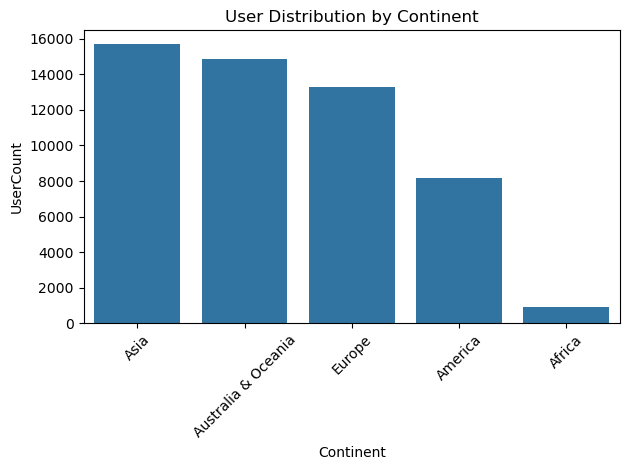

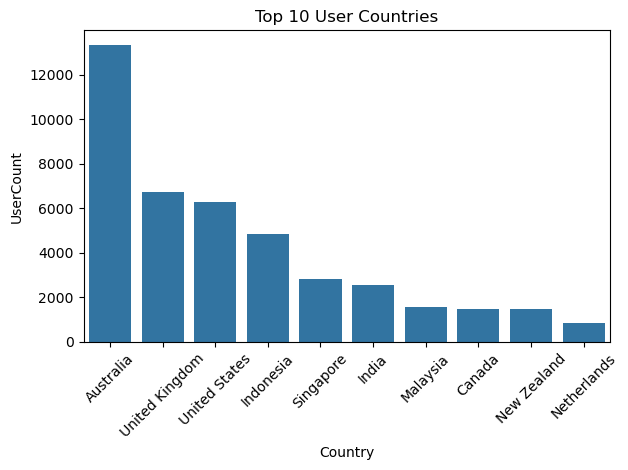

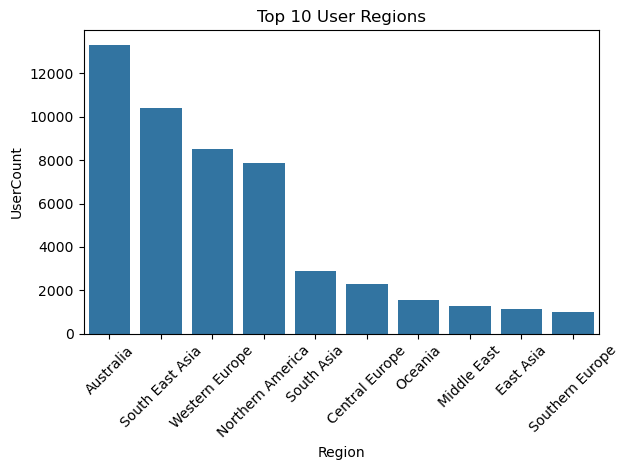

In [ ]:
#  User Distribution Across Continents, Countries, and Regions
# a. Count of Users per Continent
import seaborn as sns
import matplotlib.pyplot as plt
engine = create_engine("mysql+pymysql://root:@localhost:3306/project4")
df = pd.read_sql("SELECT * FROM data", con=engine)
# Count users per continent
continent_counts = df['VisitorContinent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'UserCount']

sns.barplot(data=continent_counts, x='Continent', y='UserCount')
plt.title('User Distribution by Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# b. Users by Country or Region
country_counts = df['VisitorCountry'].value_counts().nlargest(10).reset_index()
country_counts.columns = ['Country', 'UserCount']

sns.barplot(data=country_counts, x='Country', y='UserCount')
plt.title('Top 10 User Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

region_counts = df['VisitorRegion'].value_counts().nlargest(10).reset_index()
region_counts.columns = ['Region', 'UserCount']

sns.barplot(data=region_counts, x='Region', y='UserCount')
plt.title('Top 10 User Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

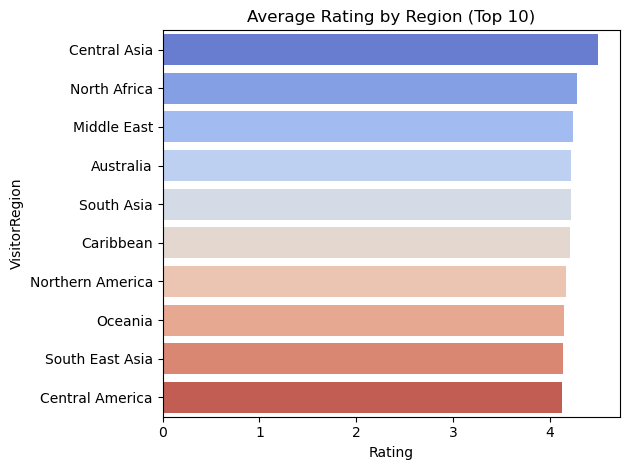

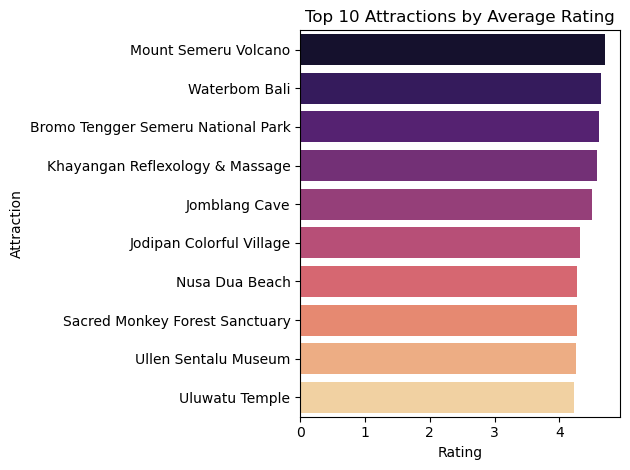

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# b. Rating by Region
region_ratings = df.groupby('VisitorRegion')['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=region_ratings.head(10), x='Rating', y='VisitorRegion', hue='VisitorRegion', palette='coolwarm', legend=False)
plt.title('Average Rating by Region (Top 10)')
plt.tight_layout()
plt.show()

# c. Rating by Attraction
top_attractions = df.groupby('Attraction')['Rating'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_attractions, x='Rating', y='Attraction', hue='Attraction', palette='magma', legend=False)
plt.title('Top 10 Attractions by Average Rating')
plt.tight_layout()
plt.show()